<a href="https://colab.research.google.com/github/subramanian72/Singapore-Flat-Price-Prediction/blob/main/SingProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Load the data
data = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

In [6]:
data.shape

(52203, 10)

In [7]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [8]:
data['town'].value_counts()

WOODLANDS          4502
JURONG WEST        4391
TAMPINES           3821
YISHUN             3588
BEDOK              3436
SENGKANG           3094
HOUGANG            2667
ANG MO KIO         2553
BUKIT BATOK        2142
BUKIT MERAH        2133
CHOA CHU KANG      2043
PASIR RIS          1777
BUKIT PANJANG      1737
TOA PAYOH          1718
KALLANG/WHAMPOA    1530
GEYLANG            1519
QUEENSTOWN         1470
PUNGGOL            1438
CLEMENTI           1306
JURONG EAST        1238
SEMBAWANG          1217
SERANGOON          1134
BISHAN              932
MARINE PARADE       403
CENTRAL AREA        315
BUKIT TIMAH          99
Name: town, dtype: int64

In [9]:
data['flat_model'].value_counts()

Model A                14430
Improved               13744
New Generation          9598
Premium Apartment       4514
Simplified              3092
Apartment               2150
Standard                2144
Maisonette              1443
Model A2                 792
Adjoined flat             84
Model A-Maisonette        75
DBSS                      72
Terrace                   33
Multi Generation          21
Improved-Maisonette        6
Premium Maisonette         4
Type S1                    1
Name: flat_model, dtype: int64

In [10]:
data['storey_range'].unique()

array(['06 TO 10', '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25',
       '26 TO 30', '36 TO 40', '31 TO 35', '04 TO 06', '01 TO 03',
       '07 TO 09', '10 TO 12', '13 TO 15', '19 TO 21', '22 TO 24',
       '16 TO 18', '25 TO 27', '28 TO 30', '37 TO 39', '34 TO 36',
       '31 TO 33', '40 TO 42'], dtype=object)

In [11]:
data['flat_type'].value_counts()

4 ROOM              20150
3 ROOM              15372
5 ROOM              11845
EXECUTIVE            4194
2 ROOM                581
1 ROOM                 40
MULTI-GENERATION       21
Name: flat_type, dtype: int64

In [12]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [13]:
data = data.drop(['month','block', 'street_name', 'lease_commence_date'], axis='columns')
data.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price
0,ANG MO KIO,2 ROOM,06 TO 10,45.0,Improved,250000.0
1,ANG MO KIO,2 ROOM,01 TO 05,44.0,Improved,265000.0
2,ANG MO KIO,3 ROOM,06 TO 10,68.0,New Generation,315000.0
3,ANG MO KIO,3 ROOM,01 TO 05,67.0,New Generation,320000.0
4,ANG MO KIO,3 ROOM,06 TO 10,67.0,New Generation,321000.0


In [14]:
data.shape

(52203, 6)

In [15]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 2


In [16]:
data.isnull().sum()

town              0
flat_type         0
storey_range      0
floor_area_sqm    0
flat_model        0
resale_price      0
dtype: int64

In [ ]:
data['resale_price']

0        250000.0
1        265000.0
2        315000.0
3        320000.0
4        321000.0
           ...   
52198    580000.0
52199    540000.0
52200    738000.0
52201    592000.0
52202    545000.0
Name: resale_price, Length: 52203, dtype: float64

Data **Cleaning**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   town            52203 non-null  object 
 1   flat_type       52203 non-null  object 
 2   storey_range    52203 non-null  object 
 3   floor_area_sqm  52203 non-null  float64
 4   flat_model      52203 non-null  object 
 5   resale_price    52203 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.4+ MB


In [18]:
new_dataset = data.dropna()

In [19]:
new_dataset.isnull().sum()

town              0
flat_type         0
storey_range      0
floor_area_sqm    0
flat_model        0
resale_price      0
dtype: int64

In [20]:
new_dataset.shape

(52203, 6)

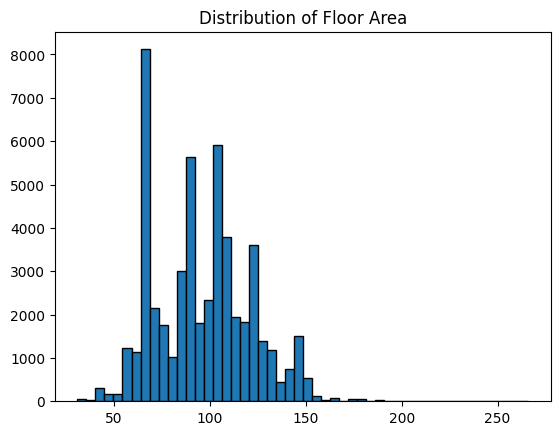

Terrace       2
Maisonette    1
Name: flat_model, dtype: int64

In [21]:
plt.hist(new_dataset['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Distribution of Floor Area')
plt.show()
display(new_dataset[new_dataset['floor_area_sqm'] > 200]['flat_model'].value_counts())

<ipython-input-32-3b61855f0a38>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


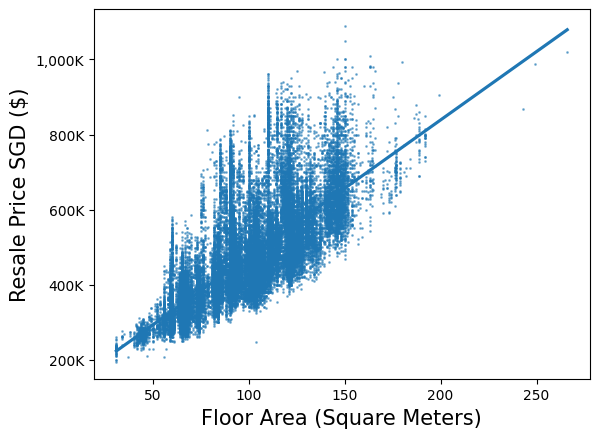

In [32]:
# Floor Area Prices
p=sns.regplot(x='floor_area_sqm', y='resale_price', data=new_dataset, scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
plt.show()

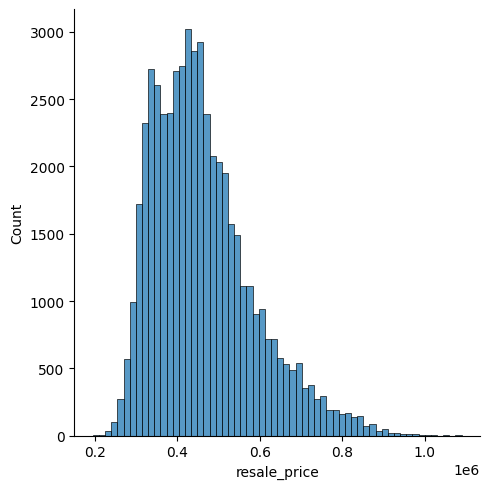

In [33]:
sns.displot(new_dataset['resale_price'],bins=60)

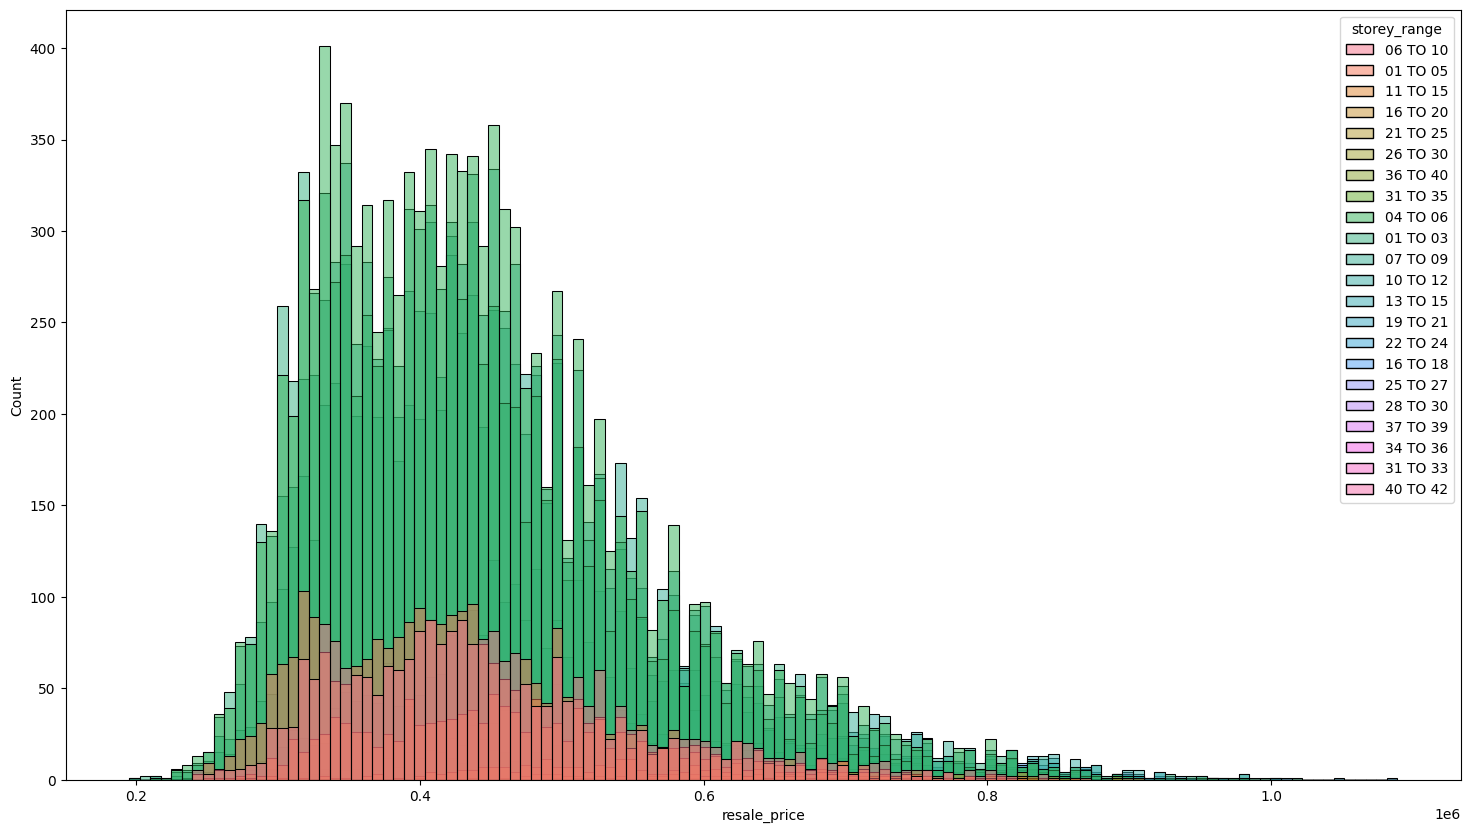

In [34]:
fig=plt.figure(figsize=(18,10))
sns.histplot(data=new_dataset ,x='resale_price', bins=120,  hue='storey_range')
plt.show()

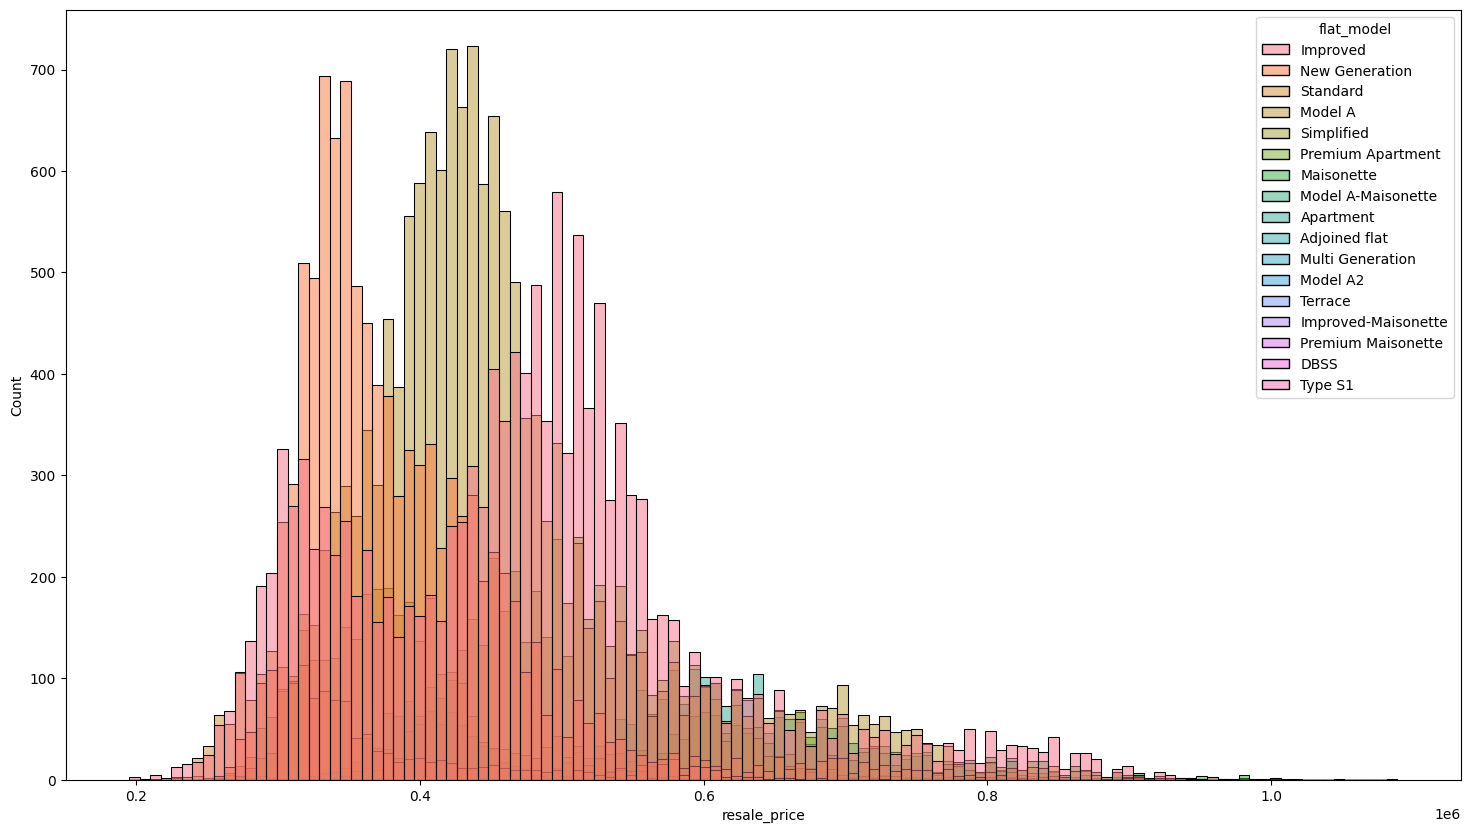

In [35]:
fig=plt.figure(figsize=(18,10))
sns.histplot(data=new_dataset,x='resale_price',bins=120,hue='flat_model')
plt.show()

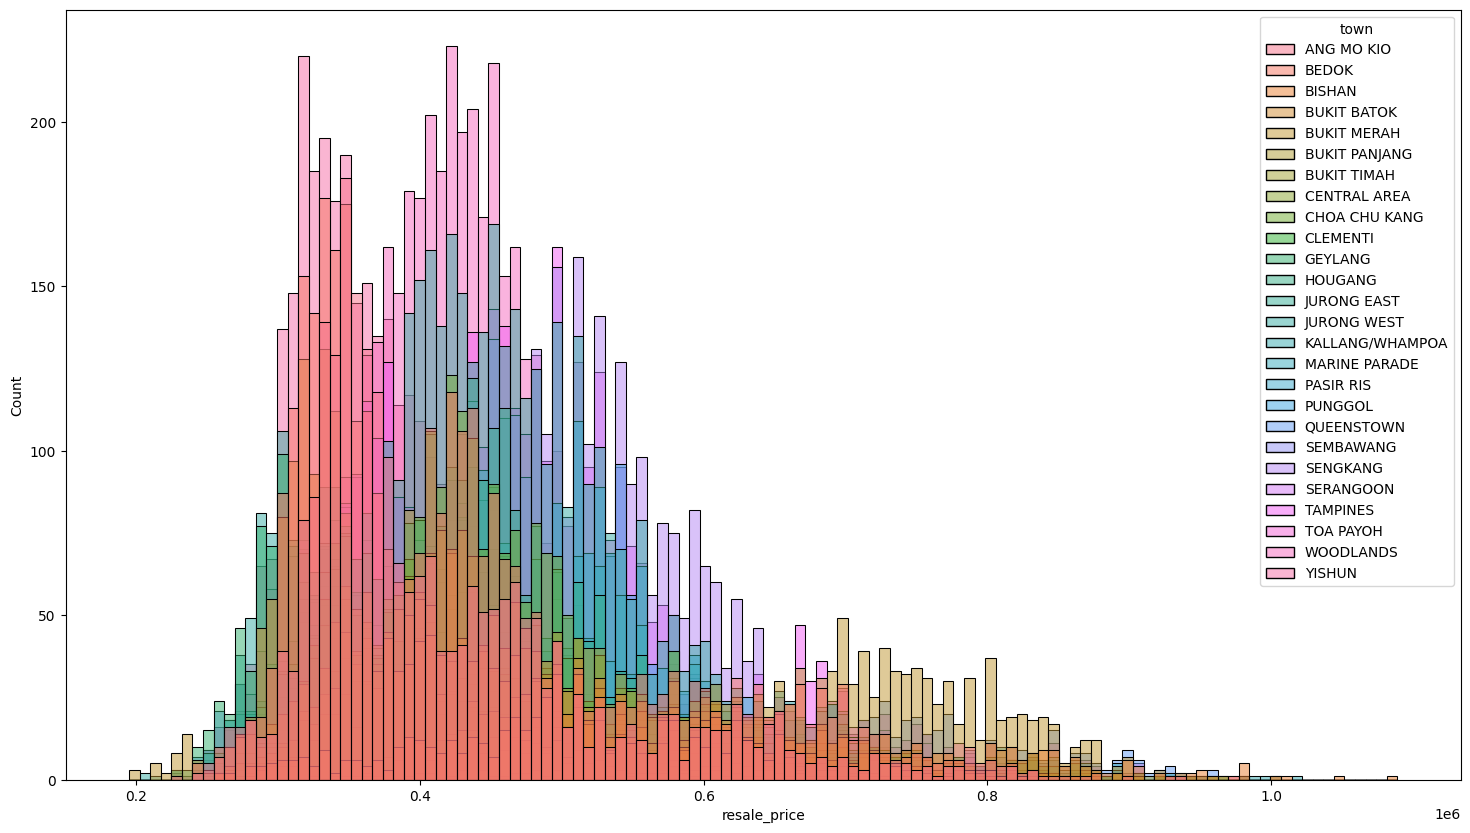

In [36]:
fig=plt.figure(figsize=(18,10))
sns.histplot(data=new_dataset,x='resale_price',bins=120,hue='town')
plt.show()

In [37]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-37-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


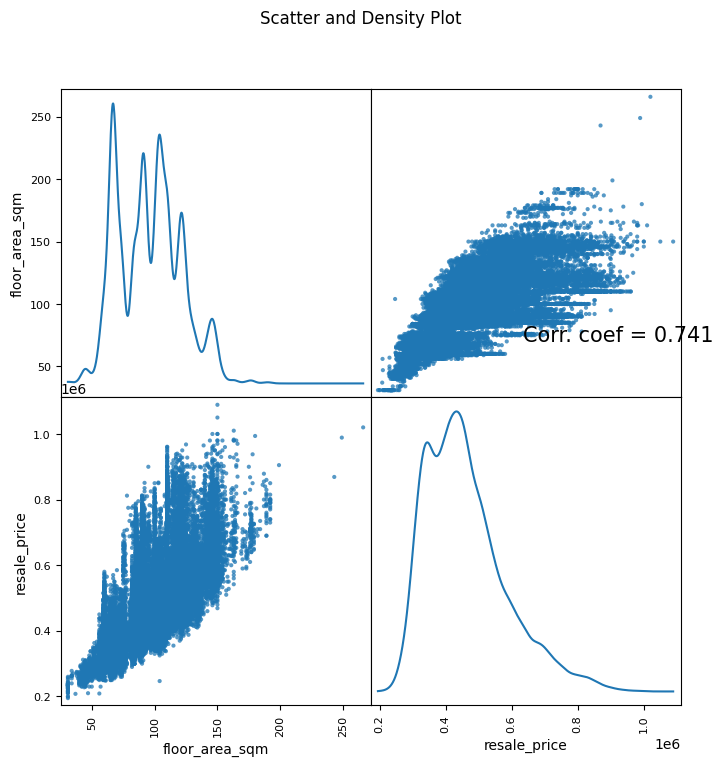

In [38]:
plotScatterMatrix(new_dataset, 8, 15)

In [22]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['town', 'flat_type', 'storey_range', 'flat_model']
No. of. categorical features:  4


In [23]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
df_final

,floor_area_sqm,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,...,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1
0,45.0,250000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44.0,265000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,68.0,315000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,67.0,320000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,67.0,321000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52198,122.0,580000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52199,146.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52200,164.0,738000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52201,152.0,592000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['resale_price'], axis=1)
y = df_final['resale_price']

# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred))
print(mean_squared_error(Y_test, Y_pred))
print("scores:", model_LR.score(X_test, Y_test))

0.08082351202331146
2471116932.501675
scores: 0.8361490036653969


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

cross_val_score(LinearRegression(), X, y, cv=5)


array([0.2704602 , 0.84188394, 0.81379426, 0.84635618, 0.76917309])

In [82]:
#GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [10,20,100],
                  'max_depth'    : [4,6,8]
                 }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 5, n_jobs=-1)
grid_GBR.fit(X_test, Y_test)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=8, subsample=0.5)

 The best score across ALL searched params:
 0.8650222328475152

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}


In [92]:
#LinearRegression model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
parameters = {
              "n_jobs": [-1],
              "copy_X" :[True, False],
              "fit_intercept": [True, False]
             }
grid_lr = GridSearchCV(estimator=reg, param_grid = parameters, cv = 2, n_jobs=-1)
grid_lr.fit(X_test, Y_test)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_lr.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_lr.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_lr.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 LinearRegression(n_jobs=-1)

 The best score across ALL searched params:
 0.8336560954986645

 The best parameters across ALL searched params:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}


In [28]:
#Gridsearchcv to find the model which is best

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X, y):
  algos = {
    'Linear_regression': {
        'model': LinearRegression(),
        'params': {
            "n_jobs": [-1],
            "copy_X" :[True, False],
            "fit_intercept": [True, False]
        }
    },
    'Gradient_booster':{
        'model': GradientBoostingRegressor(),
        'params':{
              'learning_rate': [0.01,0.02,0.03],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [10,20,100],
              'max_depth'    : [4,6,8]
        }
    },
      'Radom-forest':{
          'model': RandomForestRegressor(),
          'params': {
              "n_estimators"      : [10,20,30],
              "max_features"      : ["sqrt", "log2"],
              "min_samples_split" : [2,4,8],
          }
      }
  }
  scores = []
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=5, return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
  return pd.DataFrame(scores, columns=['model','best_score','best_params'])

# find_best_model_using_gridsearchcv(X_test,y_test)

In [109]:
#calling the function
find_best_model_using_gridsearchcv(X_test,Y_test)

,model,best_score,best_params
0,Linear_regression,0.834324,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,Gradient_booster,0.865384,"{'learning_rate': 0.03, 'max_depth': 8, 'n_est..."
2,Radom-forest,0.890118,"{'max_features': 'sqrt', 'min_samples_split': ..."


In [29]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)

print("Mean absolute percentage", mean_absolute_percentage_error(Y_test, Y_pred))
print("Mean squared error", mean_squared_error(Y_test, Y_pred))
print("score", model_RFR.score(X_test,Y_test))

Mean absolute percentage 0.05535720240840629
Mean squared error 1272198566.4867263
score 0.9156450267841938


In [44]:
X_train

,floor_area_sqm,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,...,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1
24564,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14064,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3391,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21623,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20904,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,148.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44732,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38158,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# To pickle the model

import joblib

joblib.dump(model_RFR, 'rfr_model.sav')

['rfr_model.sav']

In [42]:
def predict_price(data):
    rf_classifier = joblib.load("rfr_model.sav")
    return rf_classifier.predict(data)

In [40]:
# def predict_price(floor_area_sqm, town, flat_type, storey_range, flat_model):
#   loc_index = np.where(X.columns == town)[0][0]
#   x = np.zeros(len(X.columns))
#   x[0] = floor_area_sqm
#   x[1] = flat_type
#   x[2] = storey_range
#   x[3] = flat_model

#   if loc_index >= 0:
#     x[loc_index] = 1

#   return model_RFR.predict([x])[0]

In [ ]:
# # Loading model to compare the results
# model = pickle.load(open('model.pkl','rb'))

# result = model.score(X_valid, Y_valid)
# result2 = model.predict(X_valid)
# print(result)
# print(result2)
# print(mean_squared_error(Y_valid, result2))

-278911973565846.7
[763904. 415616. 374912. ... 338304. 459008. 306048.]
4.20640774834563e+24


In [32]:
# def predict(data):
#     rf_classifier = joblib.load("rfr_model.sav")
#     return rf_classifier.predict(data)